# K-Means Clustering Algorithm

As we discussed in the lecture, <b> k-means </b> is one of the unsupervised machine learning techniques that groups similar data points together into one cluster. <b> See the following figure to refresh your mind </b>.

<a href="https://ibb.co/4TSW0zT"><img src="https://i.ibb.co/nc1rK9c/1.jpg" width=600 height=600></a>
         

## Our Toy Example 
Think how we can utilize k-means clustering to reduce the number of colors in an image. Pixels that have the same color or closely related colors will group together into one cluster. The number of clusters will be corresonding to the number of reduced colors, i.e. If an image has 256 colors and you want to reduce it to 16 colors, then the number of clusters will be 16.

## Let's start to have a fun!
### Inputs to this program:
<b> Image: </b> The image that you would like to play with. <br>
<b> No. of colors: </b> The number of colors that you want to reduce the image's colors to.
### Output
The input image is recolored with the reduced set of colors (i.e. no. of clusters).

In [242]:
image_path= input("Enter the path of the chosen image")

Enter the path of the chosen image /Users/sarael-metwally/Downloads/Egypt.jpg


In [243]:
print("The path you entered for your image is: ",image_path);

The path you entered for your image is:  /Users/sarael-metwally/Downloads/Egypt.jpg


To let the program reads your image, the method  <b> imread </b>  from the library <b> skimage.io </b> should be used.

In [244]:
from skimage.io import imread

In [245]:
image=imread(image_path)

To display your imported image and have a nice created plots, you will need to import <b> matplotlib </b> library. 

In [246]:
import matplotlib.pyplot as plt

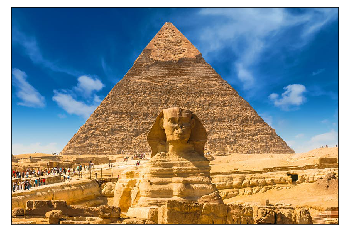

In [247]:
plt.axes(xticks=[],yticks=[]) # pass empty lists for xticks, yticks will remove all ticks location on the created plot.
plt.imshow(image)

Then, we need to explore our data (i.e. image) a bit futher by asking how many pixels (i.e. width, height, channel (RGB)) on it. This could be achieved by the property <b> shape </b> from the imported <b> numpy </b> library.  

In [248]:
import numpy as np
print(image.shape)

(565, 850, 3)


### Simple data pre-processing steps:
1. <b> Pixels' Normalization: </b> the pixels colors values are in the range (0-255). Dividing the values by 255, the new range will be (0.0 - 1.0) where 0 means 0 and 1 means 255. (Note: We converted the pixels values from the integer space into a float point in order to do math more precise and powerful). 
2. <b> Reshape image in a 2D array: </b> the final preprocessing step is reshaping our image into a two-dimentional space using a <b> reshape </b> method.   

In [249]:
nor_image= image/255.0
pre_image = nor_image.reshape(image.shape[0]*image.shape[1],image.shape[2])

Now, Decide the number of reduced colors that you want to recolor your image with.

In [251]:
n = int(input("Enter the number of reduced colors i.e. no of clusters "))

Enter the number of reduced colors i.e. no of clusters  6


### Setup K-means Clustersing Algorithm:
Because we have a huge number of pixels and in order to reduce the computation time, we will use a variant of k-means called MiniBatchKMeans. MiniBatchKMeans will create Mini-batches (i.e. subsets of the input pixels drawn randomly from the input data) and assigned to thier nearest centroid.  
1. If you would like to use the K-means clustering approach import <b> KMeans </b> from  <b> sklearn.cluster </b>
2. If you would like to use the MiniBatchKMeans import <b> MiniBatchKMeans </b> from  <b> sklearn.cluster </b>
3. Pass the <b> number of clusters </b> to the created class instance.
4. Pass the pre-processed data to train the model using <b> fit </b> method.
5. Find which cluster each pixel belongs to via <b> predict </b> method.
6. Find out our new color space which is represented by centroids <b> kmeans.cluster_centers_</b>. 

In [252]:
from sklearn.cluster import MiniBatchKMeans
kmeans= MiniBatchKMeans(n)
kmeans.fit(pre_image)
labels=kmeans.predict(pre_image)
new_colors=kmeans.cluster_centers_[labels]
print("The processing is finished")

The processing is finished


Let's reshape our new colored image and display it along side with the original one.

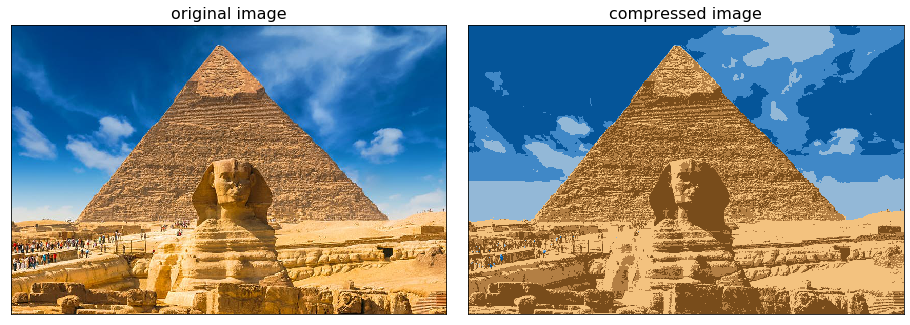

In [253]:
image_recolored=new_colors.reshape(image.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[])) 
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('original image',size=16)
ax[1].imshow(image_recolored)
ax[1].set_title('compressed image',size=16)
plt.show() 

Let's visualize the image color space before and after the reduction/compresstion step.

In [254]:
def plot_pixels(data, title,colors=None,N=10000):
    if colors is None:
       colors= data 
    rng =np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N] 
    colors=colors[i]
    R,G,B=data[i].T
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,c=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    ax[1].scatter(R,B,c=colors, marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
    fig.suptitle(title, size=20)

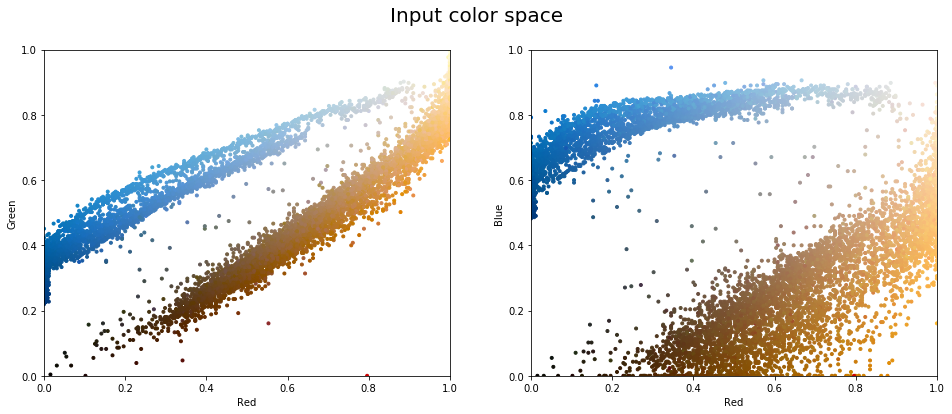

In [255]:
plot_pixels(pre_image,title='Input color space')
plt.show()

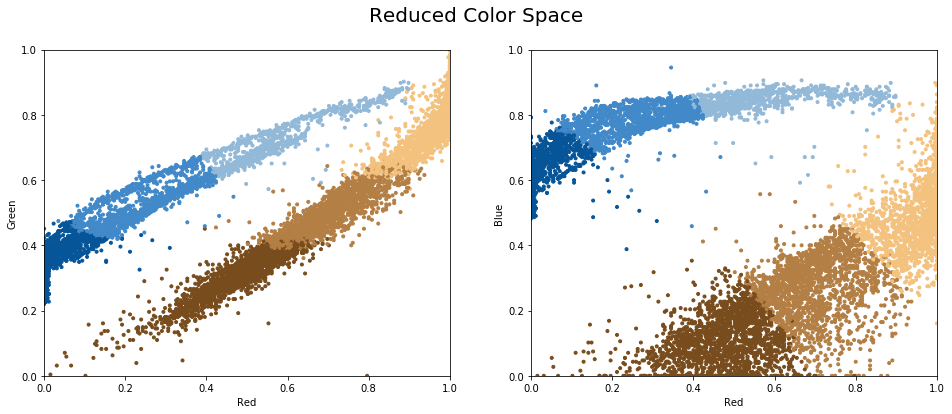

In [256]:
plot_pixels(pre_image,title="Reduced Color Space",colors=new_colors)
plt.show()